# When it is important to standardize variables?

1. It is important to standardize variables before running __Cluster Analysis__. 

- It is because cluster analysis techniques depend on the concept of measuring the __distance__ between the differen observations we're trying to cluster. If a variable is measured at a higher scale than the other variables, then whatever measure we use will be overly influenced by that variable.

2. Prior to __Principal Component Analysis__, it is critical to standardize variables. It is because PCA gives more weightage to those variables that have higher variances than to those variables that have very low variances. In effect the results of the analysis will depend on what units of measurement are used to measure each variable. Standardizing raw values makes equal variance so high weight is not assigned to variables having higher variances.

3. It is required to standardize variable before using __k-nearest neighbors__ with an Euclidean distance measure. Standardization makes all variables to contribute equally.

4. All __SVM kernel__ methods are based on distance so it is required to scale variables prior to running final Support Vector Machine (SVM) model.

5. It is necessary to standardize variables before using __Lasso and Ridge Regression__. Lasso regression puts constraints on the size of the coefficients associated to each variable. However, this value will depend on the magnitude of each variable. The result of centering the variables means that there is no longer an intercept. This applies equally to ridge regression.

6. In __regression analysis__, we can calculate __importance of variables__ by ranking independent variables based on the descending order of absolute value of __standardized coefficient.__

7. In __regression analysis__, when an interaction is created from two variables that are not centered on 0, some amount of collinearity will be induced. Centering first addresses this potential problem. In simple terms, having non-standardized variables interact simply means that when $X_1$ is big, then $X_1X_2$ is also going to be bigger on an absolute scale irrespective of $X_2$, and so $X_1$ and $X_1X_2$ will end up correlated.

8. In __regression analysis__, it is also helpful to standardize a variable when you include power terms X². Standardization removes collinearity.

# When it is not required to standardize variables

1. If you think model performance of linear regression model would improve if you standardize variables, it is absolutely incorrect! 

    It does not 
    
        change RMSE, 
        R-squared value, 
        Adjusted R-squared value, 
        p-value of coefficients. 



In [1]:
# KNN - on winequality dataset
# preprocessing

import time
import random
from math import *
import operator

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

In [4]:
# Rescale Data ************************************************

In [5]:
# When your data is comprised of attributes with varying scales, 
# many machine learning algorithms can benefit from rescaling the 
# attributes to all have the same scale.
# Often this is referred to as normalization and attributes are often 
# rescaled into the range between 0 and 1. This is useful for optimization 
# algorithms in used in the core of machine learning algorithms like 
# gradient descent. It is also useful for algorithms that weight inputs 
# like regression and neural networks and algorithms that use distance 
# measures like K-Nearest Neighbors.

# The MinMaxScaler is the probably the most famous scaling algorithm

In [6]:
# If the distribution is not Gaussian or the standard deviation is very 
# small, the min-max scaler works better.

# However, it is sensitive to outliers, so if there are outliers in the 
# data, you might want to consider the Robust Scaler.

In [7]:
data = [[-1,   2, 40], 
        [-0.5, 6, 33], 
        [3,    10, 773], 
        [1,    18, 363]]


#### Min-Max Scaler
The MinMaxScaler is the probably the most famous scaling algorithm, and follows the following formula for each feature:

$ \frac{x_i – min(x)} {max(x) – min(x)} $

It essentially shrinks the range such that the range is now between 0 and 1 (or -1 to 1 if there are negative values).

> If the distribution is __not Gaussian__ or the standard deviation is very small, the min-max scaler works __better__.

> However, it is sensitive to outliers, so if there are outliers in the data, you might want to consider the Robust Scaler below.

In [8]:
# instantiate the scaler
# copy : boolean, optional, default True
# Set to False to perform inplace row normalization

# Instantiation of the min-max scaler
scaler = MinMaxScaler()

# data = [[-1, 2], [-0.5, 6], [3, 10], [1, 18]]

In [9]:
# Fit/training the scaler
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [10]:
scaler.data_max_, scaler.data_min_, scaler.data_range_

(array([  3.,  18., 773.]), array([-1.,  2., 33.]), array([  4.,  16., 740.]))

In [11]:
scaler.data_max_

array([  3.,  18., 773.])

In [12]:
# Per feature maximum seen in the data
print('MAX           : ', scaler.data_max_)

# Per feature minimum seen in the data
print('MIN           : ', scaler.data_min_)

# Per feature range (data_max_ - data_min_) seen in the data
print('Range         : ', scaler.data_range_)

# Desired range of transformed data.
print('Feature Range : ', scaler.feature_range)

# Per feature relative scaling of the data.
print('Scale         : ', scaler.scale_)

MAX           :  [  3.  18. 773.]
MIN           :  [-1.  2. 33.]
Range         :  [  4.  16. 740.]
Feature Range :  (0, 1)
Scale         :  [0.25       0.0625     0.00135135]


In [12]:
data = [[-1,   2, 40], 
        [-0.5, 6, 33], 
        [3,    10, 773], 
        [1,    18, 363]]

In [13]:
# Scaling features of X according to feature_range.
scaler.transform(data)

array([[0.        , 0.        , 0.00945946],
       [0.125     , 0.25      , 0.        ],
       [1.        , 0.5       , 1.        ],
       [0.5       , 1.        , 0.44594595]])

In [14]:
# original data is not changed
data

[[-1, 2, 40], [-0.5, 6, 33], [3, 10, 773], [1, 18, 363]]

In [2]:
location = r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\pima.csv"

In [3]:
# load the training data from pima data set

df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_pima.shape

(768, 9)

In [5]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)

dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:, 0:8]
y = array[:, 8]

In [6]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_before_scale = pd.DataFrame(X, columns=colnames)

df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [8]:
rescaledX = scaler.fit_transform(X)

In [9]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [10]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_scaled = pd.DataFrame(rescaledX, columns=colnames)

df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


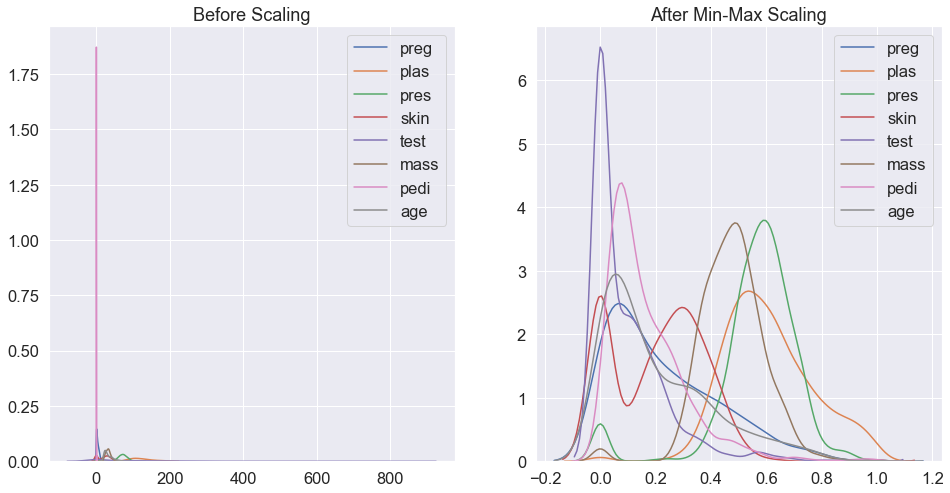

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)


ax2.set_title('After Min-Max Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

> Notice that the skewness of the distribution is maintained but the 3 distributions are brought into the same scale so that they overlap.

The __StandardScaler__ assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

$ \frac {x_i – mean(x)} {stdev(x)}$

If data is __not normally distributed, this is not the best scaler to use.__



In [25]:
# Standardize Data *********************************************

# The mean and standard deviation are calculated for the feature and 
# then the feature is scaled based on:

# [xi–mean(x)]/stdev(x)

# If data is not normally distributed, this is not the best scaler to use.

In [26]:
data = [[0, 0], [0, 0], [1, 1], [1, 1]]

In [24]:
# instantiate the scaler
# copy : boolean, optional, default True
# Set to False to perform inplace scaling

# with_mean : boolean, True by default
# If True, center the data before scaling. 

# with_std : boolean, True by default
# If True, scale the data to unit variance (or equivalently, unit S.D).

scaler = StandardScaler()

scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
print(scaler.mean_)

[  0.625   9.    302.25 ]


In [26]:
scaler.transform(data)

array([[-1.044, -1.183, -0.866],
       [-0.723, -0.507, -0.889],
       [ 1.526,  0.169,  1.555],
       [ 0.241,  1.521,  0.201]])

In [12]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\pima.csv"

In [13]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)
dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [15]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [16]:
scaler = StandardScaler()

scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
rescaledX = scaler.transform(X)

In [18]:
# summarize transformed data
np.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [35]:
print(scaler.mean_)

[  3.845 120.895  69.105  20.536  79.799  31.993   0.472  33.241]


In [19]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

df_scaled = pd.DataFrame(rescaledX, columns=colnames)

df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


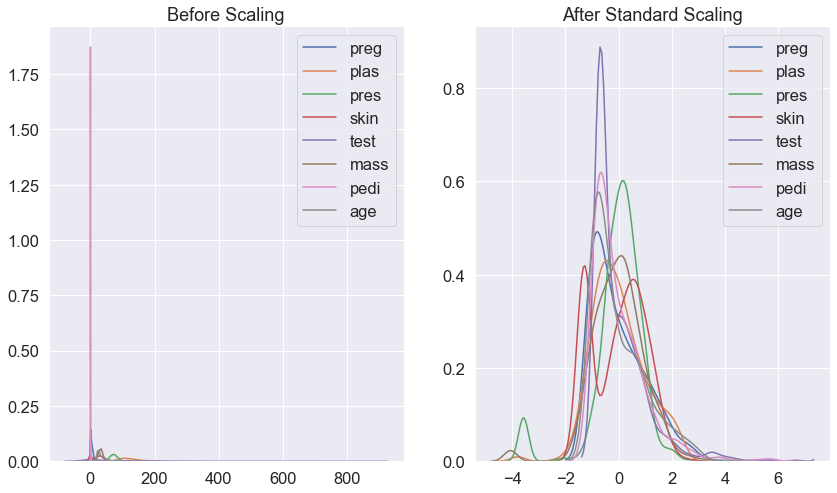

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

#### Robust Scaler *******************************************

In [38]:
# The RobustScaler uses a similar method to the Min-Max scaler but it 
# instead uses the interquartile range, rathar than the min-max, so that 
# it is robust to outliers. 

In [39]:
# For each feature.

# Of course this means it is using the less of the data for scaling so 
# it’s more suitable for when there are outliers in the data.

In [21]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\pima.csv"

In [22]:
# load the training data from pima data set
df_pima = pd.read_csv(location)
df_pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
# separate array into input and output components

#colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
#dataframe = pd.read_csv(location, names=colnames)
dataframe = pd.read_csv(location)

array = dataframe.values

X = array[:,0:8]
y = array[:,8]

In [24]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_before_scale = pd.DataFrame(X, columns=colnames)
df_before_scale.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [25]:
scaler = RobustScaler()
robust_scaled_df = scaler.fit_transform(df_before_scale)

In [26]:
# read into data frame
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_scaled = pd.DataFrame(robust_scaled_df, columns=colnames)
df_scaled.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,0.6,0.751515,0.000000,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,-0.333333,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.444444,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,-0.333333,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,-1.777778,0.37500,1.080550,1.193548,5.007843,0.235294


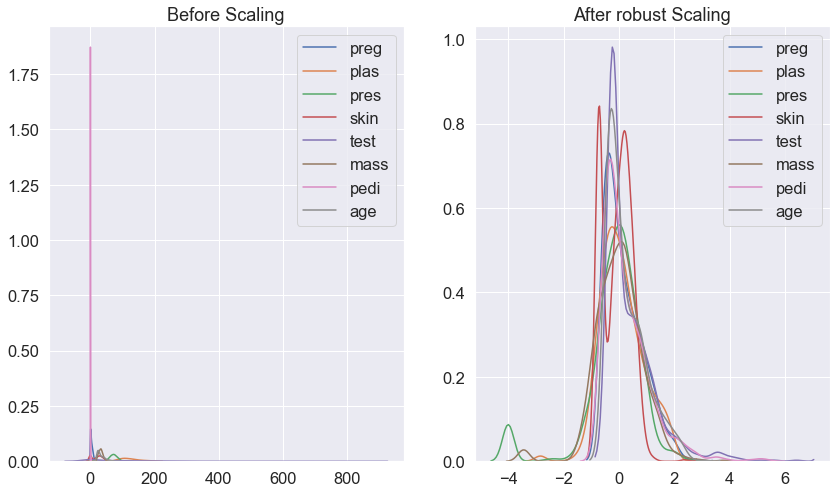

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df_before_scale['preg'], ax=ax1)
sns.kdeplot(df_before_scale['plas'], ax=ax1)
sns.kdeplot(df_before_scale['pres'], ax=ax1)
sns.kdeplot(df_before_scale['skin'], ax=ax1)
sns.kdeplot(df_before_scale['test'], ax=ax1)
sns.kdeplot(df_before_scale['mass'], ax=ax1)
sns.kdeplot(df_before_scale['pedi'], ax=ax1)
sns.kdeplot(df_before_scale['age'],  ax=ax1)

ax2.set_title('After robust Scaling')
sns.kdeplot(df_scaled['preg'], ax=ax2)
sns.kdeplot(df_scaled['plas'], ax=ax2)
sns.kdeplot(df_scaled['pres'], ax=ax2)
sns.kdeplot(df_scaled['skin'], ax=ax2)
sns.kdeplot(df_scaled['test'], ax=ax2)
sns.kdeplot(df_scaled['mass'], ax=ax2)
sns.kdeplot(df_scaled['pedi'], ax=ax2)
sns.kdeplot(df_scaled['age'],  ax=ax2);

# Normalizer
The normalizer scales each value by dividing each value by its magnitude in n-dimensional space for n number of features.

Say your features were x, y and z Cartesian co-ordinates your scaled value for x would be:

$$ \dfrac{x_i}{\sqrt{x_i^2 + y_i^2 + z_i^2}} $$

Each point is now within 1 unit of the origin on this Cartesian co-ordinate system.

In [49]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [50]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80,   1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

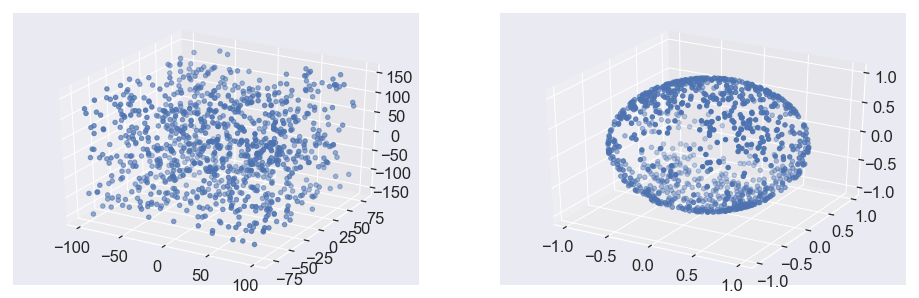

In [51]:
scaler    = Normalizer()

scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

fig = plt.figure(figsize=(16, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(df['x1'], df['y1'], df['z1'])
ax2.scatter(scaled_df['x1'], scaled_df['y1'], scaled_df['z1']);

the points are all brought within a sphere that is at most 1 away from the origin at any point. Also, the axes that were previously different scales are now all one scale.

# Partial scaling

In [28]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\Advertising.csv'

In [29]:
df = pd.read_csv(location, index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [51]:
df.shape

(200, 4)

#### Add 2 columns
- Size   { Small, Large}
- Area { Rural, Semi-Urban, Urban}

In [30]:
np.random.rand(200)

array([0.586, 0.409, 0.087, 0.822, 0.6  , 0.884, 0.853, 0.48 , 0.436,
       0.061, 0.26 , 0.285, 0.217, 0.586, 0.046, 0.168, 0.333, 0.986,
       0.718, 0.01 , 0.084, 0.48 , 0.295, 0.67 , 0.923, 0.965, 0.579,
       0.716, 0.125, 0.769, 0.423, 0.755, 0.946, 0.376, 0.658, 0.262,
       0.561, 0.115, 0.619, 0.727, 0.084, 0.265, 0.678, 0.306, 0.543,
       0.419, 0.287, 0.897, 0.465, 0.086, 0.977, 0.569, 0.437, 0.43 ,
       0.094, 0.074, 0.647, 0.643, 0.038, 0.94 , 0.594, 0.759, 0.126,
       0.077, 0.844, 0.868, 0.507, 0.962, 0.388, 0.271, 0.702, 0.471,
       0.048, 0.367, 0.425, 0.004, 0.768, 0.973, 0.071, 0.008, 0.847,
       0.317, 0.739, 0.585, 0.044, 0.072, 0.633, 0.967, 0.776, 0.154,
       0.912, 0.568, 0.939, 0.168, 0.672, 0.553, 0.428, 0.323, 0.498,
       0.311, 0.758, 0.319, 0.639, 0.919, 0.376, 0.484, 0.944, 0.609,
       0.149, 0.351, 0.515, 0.689, 0.385, 0.994, 0.091, 0.864, 0.279,
       0.068, 0.265, 0.186, 0.561, 0.489, 0.944, 0.417, 0.213, 0.922,
       0.024, 0.332,

In [31]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_large, 'Size'] = 'large'


# assign roughly one third of observations to each group
nums          = np.random.rand(len(df))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban    = nums > 0.66

df['Area'] = 'rural'

# Series.loc is a purely label-location based indexer for selection by label
df.loc[mask_suburban, 'Area'] = 'suburban'
df.loc[mask_urban,    'Area'] = 'urban'

df.head()

,TV,radio,newspaper,sales,Size,Area
1,230.1,37.8,69.2,22.1,large,urban
2,44.5,39.3,45.1,10.4,small,suburban
3,17.2,45.9,69.3,9.3,small,suburban
4,151.5,41.3,58.5,18.5,small,urban
5,180.8,10.8,58.4,12.9,large,suburban


In [32]:
df = pd.get_dummies(df, columns=['Size', 'Area'])
df.head()

,TV,radio,newspaper,sales,Size_large,Size_small,Area_rural,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,1,0,0,0,1
2,44.5,39.3,45.1,10.4,0,1,0,1,0
3,17.2,45.9,69.3,9.3,0,1,0,1,0
4,151.5,41.3,58.5,18.5,0,1,0,0,1
5,180.8,10.8,58.4,12.9,1,0,0,1,0


In [33]:
X_df = df.drop(['sales'], axis=1)
y_df = df['sales']

In [ ]:
# ct = ColumnTransformer(
#         [ ('std-sclr', StandardScaler(), ['TV', 'radio', 'newspaper']),
#           ('minmax',   MinMaxScaler(),   ['TV1', 'radio1', 'newspaper1'])
#         ],
#         remainder='passthrough'
#     )

# scaled_X = ct.fit_transform(X_df)

# scaled_X_df = pd.DataFrame(scaled_X, columns=X_df.columns)

# scaled_X_df.head()

In [34]:
ct = ColumnTransformer(
        [ ('std-sclr', StandardScaler(), ['TV', 'radio', 'newspaper'])
          
        ],
        remainder='passthrough'
    )

scaled_X = ct.fit_transform(X_df)

scaled_X_df = pd.DataFrame(scaled_X, columns=X_df.columns)

scaled_X_df.head()

,TV,radio,newspaper,Size_large,Size_small,Area_rural,Area_suburban,Area_urban
0,0.969852,0.981522,1.778945,1.0,0.0,0.0,0.0,1.0
1,-1.197376,1.082808,0.669579,0.0,1.0,0.0,1.0,0.0
2,-1.516155,1.528463,1.783549,0.0,1.0,0.0,1.0,0.0
3,0.052050,1.217855,1.286405,0.0,1.0,0.0,0.0,1.0
4,0.394182,-0.841614,1.281802,1.0,0.0,0.0,1.0,0.0


#### scikit learn label encoding

- LabelEncoder can be used to normalize labels.
- It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [10]:
le = preprocessing.LabelEncoder()

le.fit(['Y', 'N', 'May be'])

LabelEncoder()

In [11]:
le.classes_


array(['May be', 'N', 'Y'], dtype='<U6')

In [12]:
le.transform(['Y', 'Y', 'Y', 'Y']) 


array([2, 2, 2, 2], dtype=int64)

In [16]:
le.inverse_transform([2,1,0,2])


array(['Y', 'N', 'May be', 'Y'], dtype='<U6')

#### ordinal encoder

In [19]:
enc = preprocessing.OrdinalEncoder()

X = [['Male', 1], ['Female', 3], ['Female', 2]]

enc.fit(X)

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [20]:
enc.categories_

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]